### Importación de datos



In [105]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



     Tienda Precio_formateado
0  Tienda 1    $1,150,880,400
1  Tienda 2    $1,116,343,500
2  Tienda 3    $1,098,019,600
3  Tienda 4    $1,038,375,700


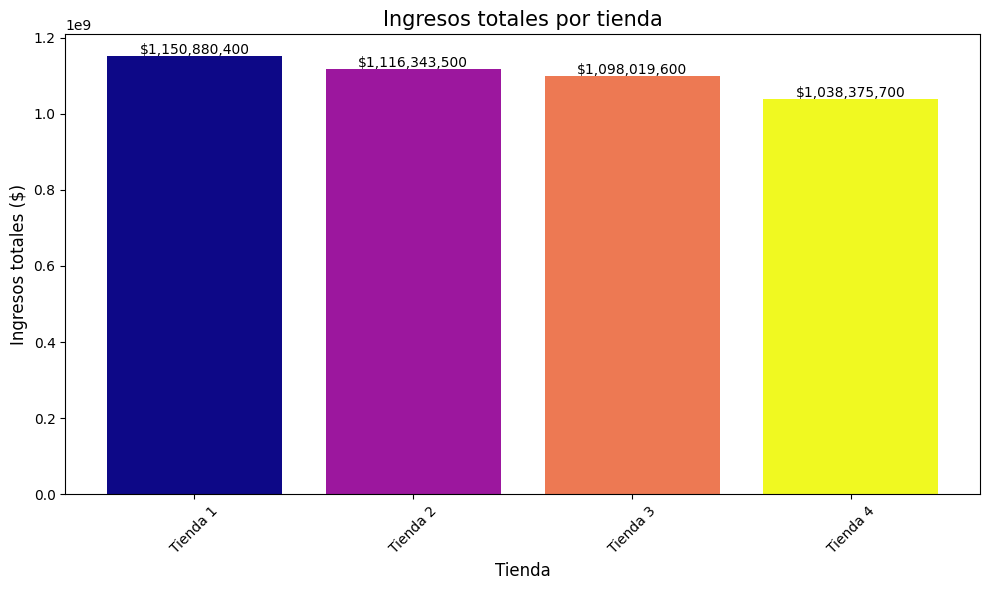

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# 0. Agregar identificadores a los data frames
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Agrupamos todo en un solo DataFrame
frame_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Agrupar por tienda y sumar ingresos
ingresos_por_tienda = (
    frame_tiendas.groupby('Tienda')['Precio']
    .sum()
    .reset_index()
    .sort_values('Precio', ascending=False)
)

# Crear columna formateada para mostrar (no para graficar)
ingresos_por_tienda['Precio_formateado'] = ingresos_por_tienda['Precio'].apply(lambda x: f"${x:,.0f}")

# Mostrar tabla
print(ingresos_por_tienda[['Tienda', 'Precio_formateado']])
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Crear figura
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Gráfico de barras con la columna numérica
bars = plt.bar(
    ingresos_por_tienda['Tienda'],
    ingresos_por_tienda['Precio'],
    #color='skyblue'# <- sigue siendo numérico
    color=plt.cm.plasma(np.linspace(0, 1, len(ingresos_por_tienda)))
)

# Títulos y etiquetas
plt.title('Ingresos totales por tienda', fontsize=15)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingresos totales ($)', fontsize=12)

# Etiquetas en cada barra
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.,
        height + 5_000_000,
        f"${height:,.0f}",  # Etiqueta formateada
        ha='center',
        fontsize=10
    )

# Mejorar visualización si hay muchas tiendas
plt.xticks(rotation=45)

# Ajustar espacio
plt.tight_layout()

# Mostrar gráfico
plt.show()


# Ejemplo: ingresos por tienda
plt.figure(figsize=(10, 6))
bars = plt.bar(
    ingresos_por_tienda['Tienda'],
    ingresos_por_tienda['Precio'],
    color=plt.cm.plasma(np.linspace(0, 1, len(ingresos_por_tienda)))
)
plt.title('Ingresos totales por tienda', fontsize=15)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingresos totales ($)', fontsize=12)
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 5_000_000, f"${height:,.0f}", ha='center', fontsize=10)
plt.tight_layout()
plt.savefig('ingresos_por_tienda.png')  # Guardar imagen
plt.close()



# 2. Ventas por categoría

Cantidad de productos por tienda y categoría:
      Tienda   Categoría del Producto  Cantidad
0   Tienda 1  Artículos para el hogar       171
1   Tienda 1     Deportes y diversión       284
2   Tienda 1        Electrodomésticos       312
3   Tienda 1             Electrónicos       448
4   Tienda 1   Instrumentos musicales       182
5   Tienda 1                 Juguetes       324
6   Tienda 1                   Libros       173
7   Tienda 1                  Muebles       465
8   Tienda 2  Artículos para el hogar       181
9   Tienda 2     Deportes y diversión       275
10  Tienda 2        Electrodomésticos       305
11  Tienda 2             Electrónicos       422
12  Tienda 2   Instrumentos musicales       224
13  Tienda 2                 Juguetes       313
14  Tienda 2                   Libros       197
15  Tienda 2                  Muebles       442
16  Tienda 3  Artículos para el hogar       177
17  Tienda 3     Deportes y diversión       277
18  Tienda 3        Electrodomésticos     

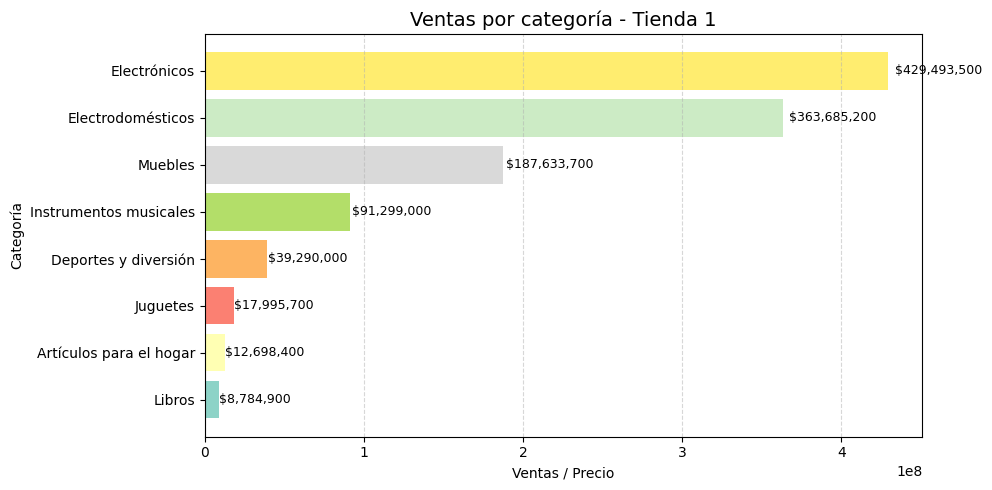

Gráfico guardado como: ventas_categoria_tienda_1.png


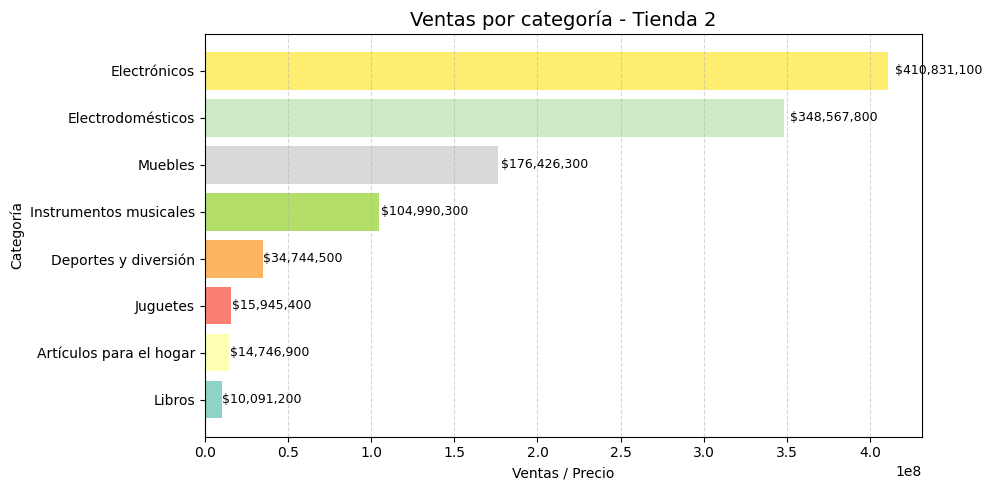

Gráfico guardado como: ventas_categoria_tienda_2.png


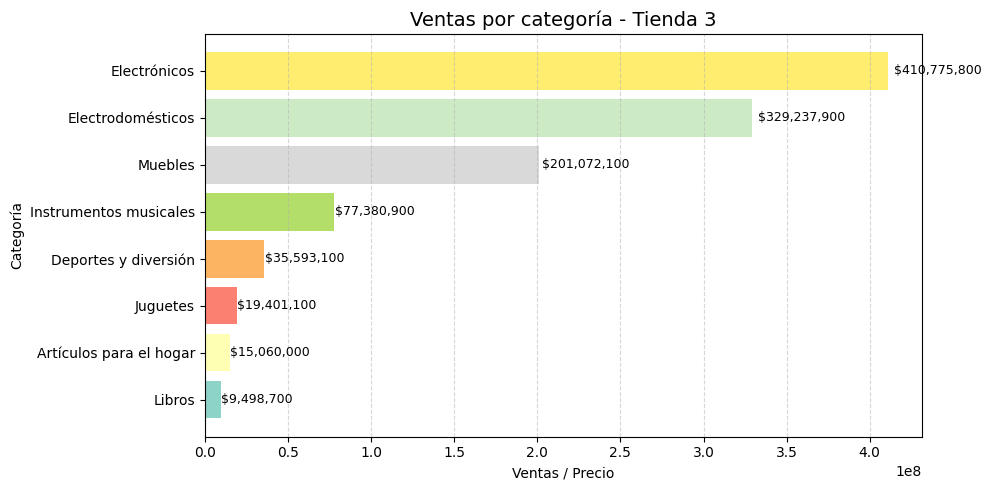

Gráfico guardado como: ventas_categoria_tienda_3.png


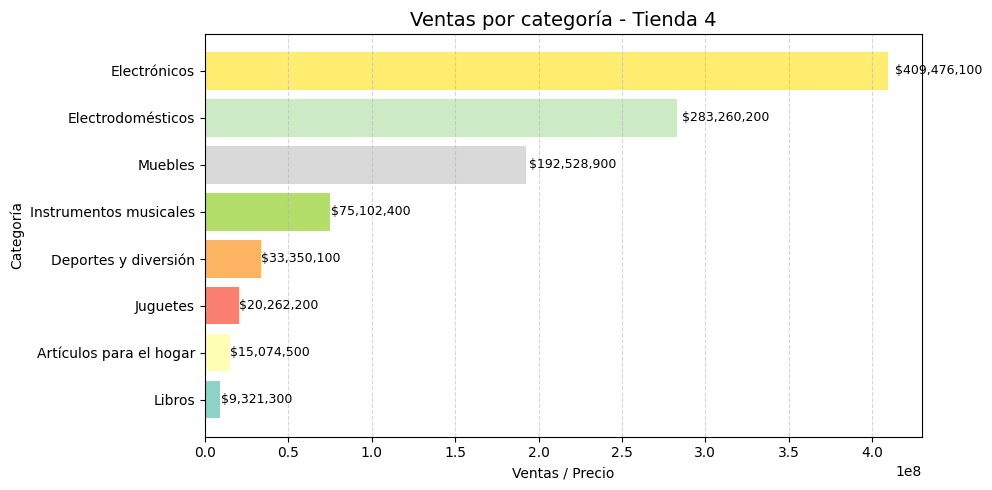

Gráfico guardado como: ventas_categoria_tienda_4.png


In [112]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# 1. Sumar los precios por tienda y categoría
cantidad_por_tienda_categoria = frame_tiendas.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad')

print("Cantidad de productos por tienda y categoría:")
print(cantidad_por_tienda_categoria)

##########################################################
##########################################################

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

tiendas = frame_tiendas['Tienda'].unique()

for tienda in tiendas:
    df_tienda = frame_tiendas[frame_tiendas['Tienda'] == tienda]
    resumen = df_tienda.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=True)

    categorias = resumen.index
    colores = plt.get_cmap('Set3')(np.linspace(0, 1, len(categorias)))

    plt.figure(figsize=(10, 5))
    bars = plt.barh(categorias, resumen.values, color=colores)

    plt.title(f'Ventas por categoría - {tienda}', fontsize=14)
    plt.xlabel('Ventas / Precio')
    plt.ylabel('Categoría')
    plt.grid(axis='x', linestyle='--', alpha=0.5)

    # Etiquetas con valores
    for bar in bars:
        width = bar.get_width()
        plt.text(width + width * 0.01, bar.get_y() + bar.get_height() / 2,
                 f"${width:,.0f}", va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

    # Nombre dinámico del archivo
    nombre_archivo = f"ventas_categoria_{tienda.replace(' ', '_').lower()}.png"

    # Guardar el gráfico
    plt.savefig(nombre_archivo, dpi=300, bbox_inches='tight')
    plt.close()

    print(f"Gráfico guardado como: {nombre_archivo}")


##########################################################
##########################################################


# 3. Calificación promedio de la tienda


Calificación promedio por tienda:
     Tienda  Calificación
0  Tienda 1      3.976685
1  Tienda 2      4.037304
2  Tienda 3      4.048326
3  Tienda 4      3.995759


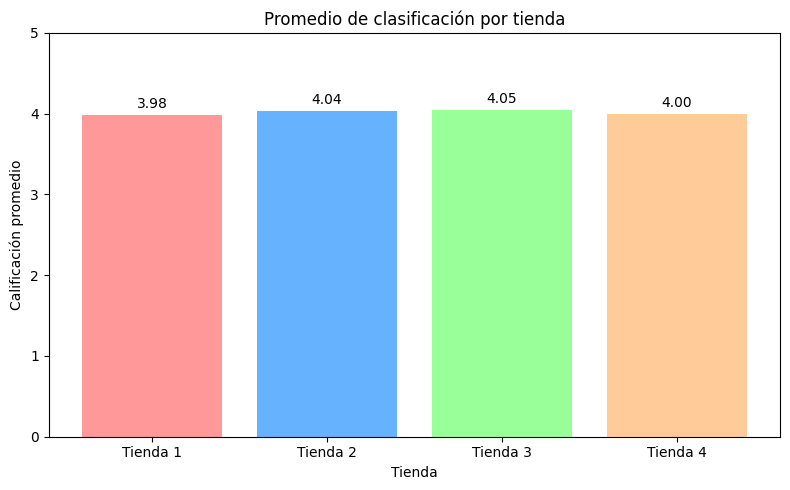

Gráfico guardado como: calificacion_promedio.png


In [124]:
calificacion_promedio = frame_tiendas.groupby('Tienda')['Calificación'].mean().reset_index()
print("Calificación promedio por tienda:")
print(calificacion_promedio)


#########################################

import matplotlib.pyplot as plt

# Calcular promedio por tienda
calificacion_promedio = frame_tiendas.groupby('Tienda')['Calificación'].mean().reset_index()

plt.figure(figsize=(8, 5))

# Colores personalizados
colores = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

bars = plt.bar(
    calificacion_promedio['Tienda'],
    calificacion_promedio['Calificación'],
    color=colores
)

plt.title('Promedio de clasificación por tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación promedio')
plt.ylim(0, 5)

# Etiquetas encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.05,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

# Guardar el gráfico
nombre_archivo = "calificacion_promedio.png"
plt.savefig(nombre_archivo, dpi=300, bbox_inches='tight')
plt.close()

print(f"Gráfico guardado como: {nombre_archivo}")






#########################################

# 4. Productos más y menos vendidos

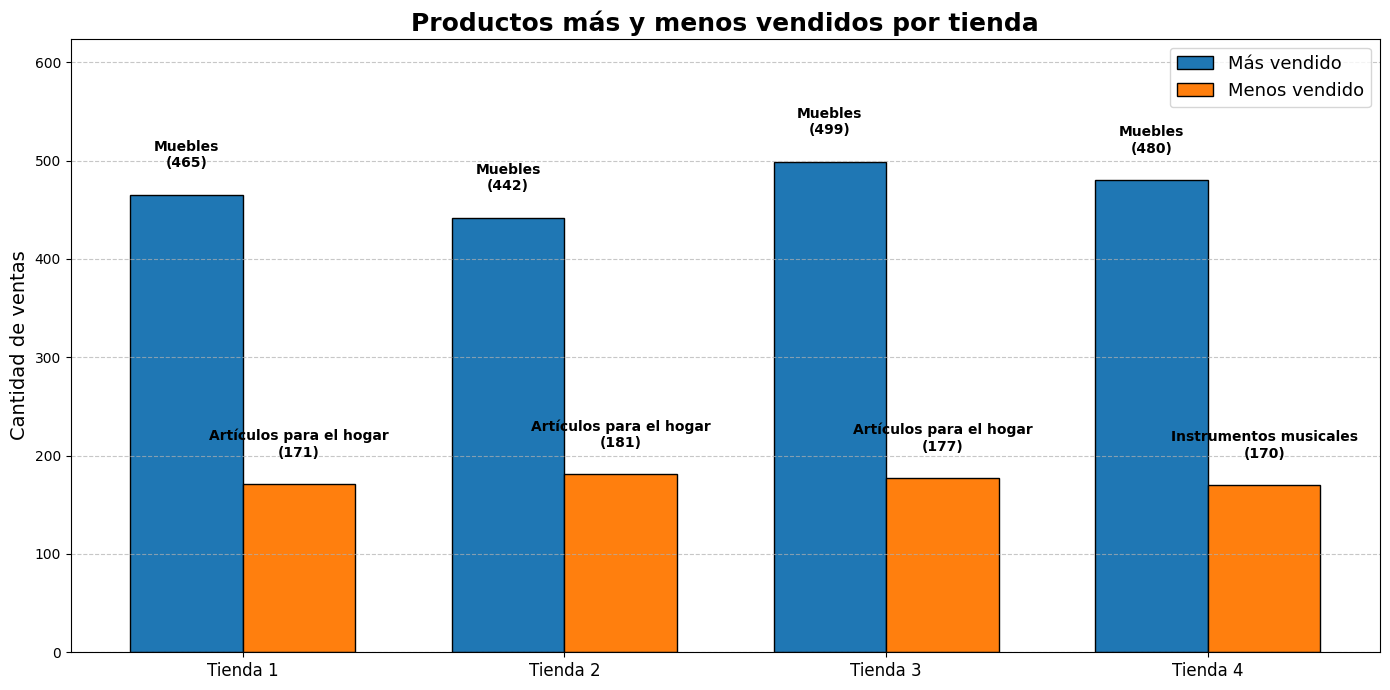

✅ Gráfico guardado como productos_mas_menos_vendidos.png


In [121]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 7))

tiendas = df_grafico['Tienda'].unique()
x = np.arange(len(tiendas))
width = 0.35

max_data = df_grafico[df_grafico['Tipo'] == 'Más vendido'].set_index('Tienda').loc[tiendas]
min_data = df_grafico[df_grafico['Tipo'] == 'Menos vendido'].set_index('Tienda').loc[tiendas]

bars1 = plt.bar(x - width/2, max_data['Cantidad_Vendida'], width, label='Más vendido',
                color='#1f77b4', edgecolor='black')
bars2 = plt.bar(x + width/2, min_data['Cantidad_Vendida'], width, label='Menos vendido',
                color='#ff7f0e', edgecolor='black')

plt.title('Productos más y menos vendidos por tienda', fontsize=18, fontweight='bold')
plt.ylabel('Cantidad de ventas', fontsize=14)
plt.xticks(x, tiendas, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

def etiquetar_barras(barras, productos, cantidades):
    for bar, producto, cantidad in zip(barras, productos, cantidades):
        altura = bar.get_height()
        etiqueta = f"{producto}\n({cantidad})"
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            altura + max(df_grafico['Cantidad_Vendida']) * 0.05,
            etiqueta,
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )

etiquetar_barras(bars1, max_data['Categoría del Producto'], max_data['Cantidad_Vendida'])
etiquetar_barras(bars2, min_data['Categoría del Producto'], min_data['Cantidad_Vendida'])

plt.legend(fontsize=13)
plt.ylim(0, max(df_grafico['Cantidad_Vendida']) * 1.25)
plt.tight_layout()
plt.show()
# GUARDAR EL GRÁFICO AQUÍ
plt.savefig("productos_mas_menos_vendidos.png", dpi=300, bbox_inches='tight')
plt.close()

print("✅ Gráfico guardado como productos_mas_menos_vendidos.png")



# 5. Envío promedio por tienda

     Tienda  Costo de envío
0  Tienda 1    26018.609580
1  Tienda 2    25216.235693
2  Tienda 3    24805.680373
3  Tienda 4    23459.457167


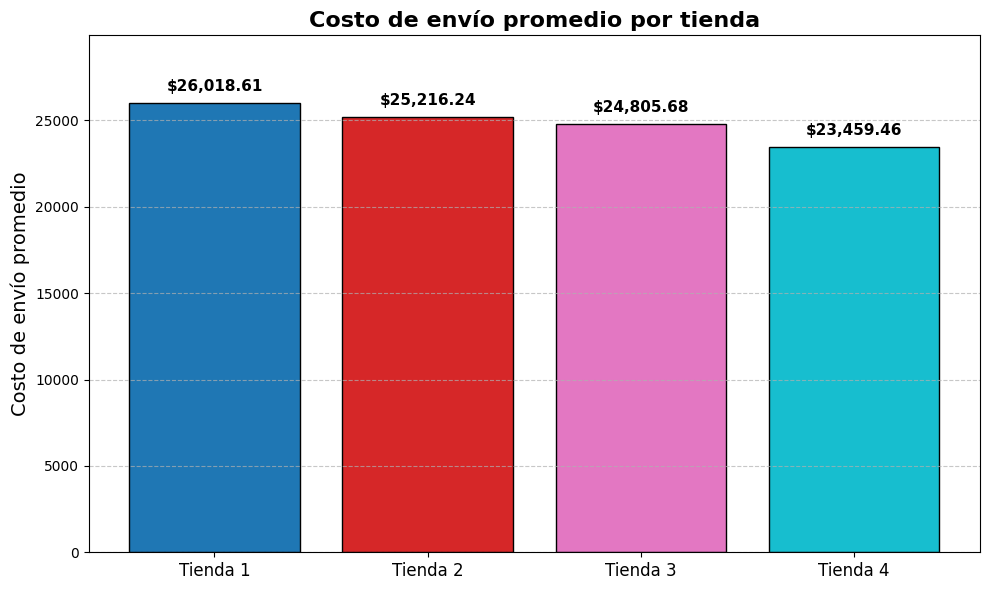

✅ Gráfico guardado como promedio por tienda.png


In [123]:

#Calcula el envío Promedio
envio_promedio = frame_tiendas.groupby('Tienda')['Costo de envío'].mean().reset_index()

# Mostrar resultados
print(envio_promedio)

import matplotlib.pyplot as plt
import numpy as np

# Calcular envío promedio por tienda
envio_promedio = frame_tiendas.groupby('Tienda')['Costo de envío'].mean().reset_index()

plt.figure(figsize=(10, 6))

x = np.arange(len(envio_promedio['Tienda']))
width = 0.6

# Colores diferentes para cada barra usando tab10
colores = plt.cm.tab10(np.linspace(0, 1, len(envio_promedio)))

bars = plt.bar(x, envio_promedio['Costo de envío'], color=colores, edgecolor='black')

plt.title('Costo de envío promedio por tienda', fontsize=16, fontweight='bold')
plt.ylabel('Costo de envío promedio', fontsize=14)
plt.xticks(x, envio_promedio['Tienda'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas encima de cada barra con el valor formateado
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(envio_promedio['Costo de envío']) * 0.02,
        f"${height:,.2f}",
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='semibold',
        color='black'
    )

plt.ylim(0, max(envio_promedio['Costo de envío']) * 1.15)
plt.tight_layout()
plt.show()

# GUARDAR EL GRÁFICO AQUÍ
plt.savefig("envio_promedio_por_tienda.png", dpi=300, bbox_inches='tight')
plt.close()

print("✅ Gráfico guardado como promedio por tienda.png")

